# Linear Regressor

In [1]:
import numpy as np

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
)

train_input = train_input.reshape((-1, 1))
test_input = test_input.reshape((-1, 1))

test_input.shape

(14, 1)

## 1변수 선형 회귀

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [5]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.018644953547


In [6]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313562


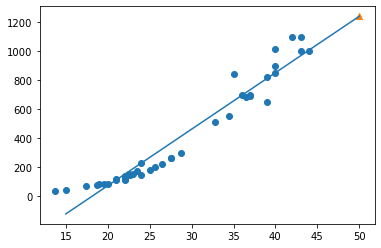

In [7]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.show()

## 다변수 선형 회귀

column_stack() 함수를 이용하면 numpy배열에서 column을 추가할 수 있다

In [8]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))    

In [9]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [10]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278293


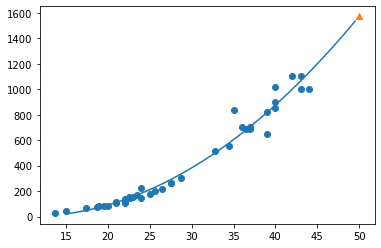

In [11]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

point = np.arange(15, 50, 0.5)

plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)

plt.scatter(50, 1573, marker='^')
plt.show()

## 특성 공학과 규제

특성 공학은 기본 특성들을 잘 조합해 새로운 특성을 찾아내는 것을 의미한다  
규제는 과대적합을 막기 위해 계수를 줄여 규제화하는 것을 말한다. 규제에는 릿지와 라쏘가 있으며 릿지는 계수들의 L1 노름을 라쏘는 계수들의 L0노름을 추가하는 것이다.

In [19]:
# 새로운 데이터를 불러온다
# pandas 라이브러리를 이용한다
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [20]:
from sklearn.preprocessing import PolynomialFeatures # 사이킷런에서는 데이터를 전처리학 위한 변환기를 제공한다

In [21]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [22]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [23]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999957028


In [24]:
print(lr.score(test_poly, test_target))

-144.40508211356158


위의 경우처럼 너무 많은 특성을 넣다보면 과적합이 생기곤 한다.  
이럴 떄는 적절한 규제를 넣어주어 기울기 계수가 너무 커지는 것을 방지하면 도움이 되기도 한다.
규제는 계수를 기반으로 이루어지기 때문에 정규화를 먼저 해주는 것이 도움이 된다.

In [26]:
# 사이킷런에서는 정규화 클래스도 제공한다
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [27]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [28]:
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [29]:
print(ridge.score(test_scaled, test_target))

0.9790693977615393


릿지(혹은 라쏘)회귀에서 alpha 값은 사람이 직접 설정해야 한다. alpha값은 규제가 어느 정도로 세게 들어갈 것인지를 결정한다.

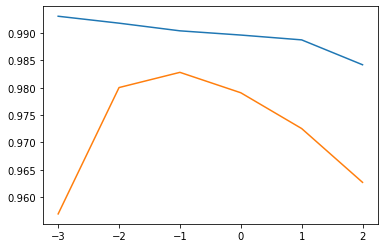

In [31]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for alpha in alpha_list:
    ridge = Ridge(alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

그래프를 보면 0.1이 가장 좋은 것을 알 수 있다

In [ ]:
# 라쏘 회귀 (라쏘 회귀도 릿지 회귀와 비슷하게 하면 된다)
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096
